<a href="https://colab.research.google.com/github/Akshayextreme/Mood_detection_hackathon/blob/master/Mood_detector_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/Akshayextreme/Mood_detection_hackathon/blob/master/Mood_detector_VGG16.ipynb)

# Imports

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
%cd /content/drive/My\ Drive/Colab\ Notebooks/aithon2020-level-2

/content/drive/My Drive/Colab Notebooks/aithon2020-level-2


# EDA

In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('./data/aithon2020_level2_traning.csv')

In [ ]:
df.head()

,emotion,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,pixel_11,pixel_12,pixel_13,pixel_14,pixel_15,pixel_16,pixel_17,pixel_18,pixel_19,pixel_20,pixel_21,pixel_22,pixel_23,pixel_24,pixel_25,pixel_26,pixel_27,pixel_28,pixel_29,pixel_30,pixel_31,pixel_32,pixel_33,pixel_34,pixel_35,pixel_36,pixel_37,pixel_38,...,pixel_2264,pixel_2265,pixel_2266,pixel_2267,pixel_2268,pixel_2269,pixel_2270,pixel_2271,pixel_2272,pixel_2273,pixel_2274,pixel_2275,pixel_2276,pixel_2277,pixel_2278,pixel_2279,pixel_2280,pixel_2281,pixel_2282,pixel_2283,pixel_2284,pixel_2285,pixel_2286,pixel_2287,pixel_2288,pixel_2289,pixel_2290,pixel_2291,pixel_2292,pixel_2293,pixel_2294,pixel_2295,pixel_2296,pixel_2297,pixel_2298,pixel_2299,pixel_2300,pixel_2301,pixel_2302,pixel_2303
0,Fear,231,212,156,164,174,138,161,173,182,200,106,38,39,74,138,161,164,179,190,201,210,216,220,224,222,218,216,213,217,220,220,218,217,212,174,160,162,160,139,...,225,220,215,207,199,167,108,151,122,88,71,84,120,127,105,76,71,78,90,106,123,146,155,148,130,141,119,69,54,89,104,138,152,122,114,101,97,88,110,152
1,Fear,55,55,55,55,55,54,60,68,54,85,151,163,170,179,181,185,188,188,191,196,189,194,198,197,195,194,190,193,195,184,175,172,161,159,158,159,147,136,137,...,64,90,120,121,127,136,128,150,154,157,155,167,172,174,173,171,167,163,164,160,155,148,148,144,130,126,124,116,118,110,90,83,77,53,37,34,30,34,30,57
2,Sad,20,17,19,21,25,38,42,42,46,54,56,62,63,66,82,108,118,130,139,134,132,126,113,97,126,148,157,161,155,154,154,164,189,204,194,168,180,188,214,...,63,42,43,76,80,76,73,69,64,59,53,54,52,54,57,60,66,71,77,85,89,93,102,106,105,99,85,62,34,22,29,36,68,91,85,93,97,99,107,118
3,Happy,4,2,13,41,56,62,67,87,95,62,65,70,80,107,127,149,153,150,165,168,177,187,176,167,152,128,130,149,149,146,130,139,139,143,134,105,78,56,36,...,19,16,11,8,46,47,46,47,48,51,55,55,56,76,85,84,84,77,86,86,80,79,82,84,76,62,57,62,61,62,59,66,80,74,69,99,28,3,7,12
4,Fear,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,43,57,66,74,76,76,82,87,97,72,30,60,68,78,72,63,46,80,80,35,39,48,65,90,89,53,17,37,44,82,94,21,22,51,71,80,82,79,79,83


In [ ]:
df.shape

(10817, 2305)

In [ ]:
df.isnull().sum()

emotion       0
pixel_0       0
pixel_1       0
pixel_2       0
pixel_3       0
             ..
pixel_2299    0
pixel_2300    0
pixel_2301    0
pixel_2302    0
pixel_2303    0
Length: 2305, dtype: int64

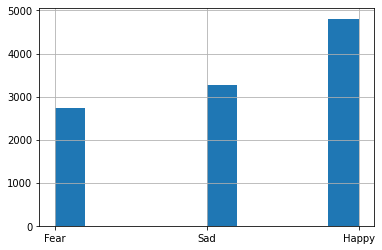

In [ ]:
df.emotion.hist()

In [9]:
X = df.iloc[:,1:].values
y = df.emotion.values

Happy


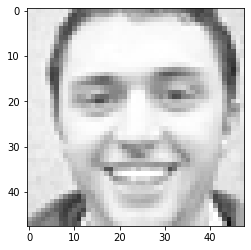

In [ ]:
from matplotlib import pyplot as mlt
mlt.imshow(X[10].reshape(48,48), cmap='gray', vmin=0, vmax=255)
print(y[10])

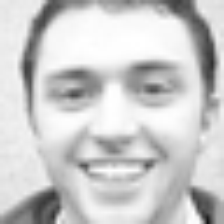

In [ ]:
from PIL import Image
image = Image.fromarray(np.uint8(X[10].reshape(48,48)))
img = image.resize((224, 224), Image.BILINEAR)
img

In [ ]:
np.asarray(img).shape

(224, 224)

# ExtraTreeClassifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32, shuffle=True)

In [ ]:
model = ExtraTreesClassifier(n_jobs=-1)
model.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.5965804066543438

In [ ]:
model.get_params

<bound method BaseEstimator.get_params of ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)>

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
# Number of trees in random forest
n_estimators = [10, 120, 200, 400, 600]
# Number of features to consider at every split
max_features = ['log2', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
criterion = ["gini", "entropy"]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion' : criterion}
pprint(random_grid)

{'bootstrap': [True, False],
 'criterion': ['gini', 'entropy'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['log2', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 120, 200, 400, 600]}


In [ ]:
RandomModel = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1, scoring='accuracy')

In [ ]:
RandomModel.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 21.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 41.8min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=ExtraTreesClassifier(bootstrap=False,
                                                  ccp_alpha=0.0,
                                                  class_weight=None,
                                                  criterion='gini',
                                                  max_depth=None,
                                                  max_features='auto',
                                                  max_leaf_nodes=None,
                                                  max_samples=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                        

In [ ]:
RandomModel.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 40,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 400}

In [ ]:
from sklearn.model_selection import GridSearchCV
n_estimators = [300,350,400,450,500]
max_depth = [30,35,40,45,50]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               }
pprint(random_grid)

{'max_depth': [30, 35, 40, 45, 50], 'n_estimators': [300, 350, 400, 450, 500]}


In [ ]:
rf = ExtraTreesClassifier(random_state = 43,
                            bootstrap=False,
                            criterion='gini',
                            max_features='sqrt',
                            min_samples_leaf=1,
                            min_samples_split=5,
                            n_jobs=-1)

In [ ]:
GridModel = GridSearchCV(estimator = rf, param_grid= random_grid, cv = 3, verbose=2, n_jobs = -1, scoring='accuracy')

In [ ]:
# Fit the random search model
GridModel.fit(X_train, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed: 23.1min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                            class_weight=None, criterion='gini',
                                            max_depth=None, max_features='sqrt',
                                            max_leaf_nodes=None,
                                            max_samples=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=5,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            oob_score=False, random_state=43,
                                            verbose=0, warm_start=False),
             iid='deprecated', 

In [ ]:
GridModel.best_params_

{'max_depth': 30, 'n_estimators': 400}

In [ ]:
pred = GridModel.predict(X_test)

In [ ]:
accuracy_score(y_test, pred)

0.6081330868761553

# Simple NN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, encoded_y, test_size=0.2, random_state=32, shuffle=True)

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

In [ ]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 3
print("Shape before one-hot encoding: ", y_train.shape)
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", y_train.shape)

Shape before one-hot encoding:  (8653,)
Shape after one-hot encoding:  (8653, 3)


In [ ]:
# building a linear stack of layers with the sequential model
model = Sequential()
# hidden layer
model.add(Dense(4000, input_shape=(2304,), activation='relu'))
model.add(Dense(2000, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(100, activation='relu'))
# output layer
model.add(Dense(3, activation='softmax'))

# looking at the model summary
model.summary()
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
# training the model for 10 epochs
model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test, y_test))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 4000)              9220000   
_________________________________________________________________
dense_7 (Dense)              (None, 2000)              8002000   
_________________________________________________________________
dense_8 (Dense)              (None, 1000)              2001000   
_________________________________________________________________
dense_9 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_10 (Dense)             (None, 100)               50100     
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 303       
Total params: 19,773,903
Trainable params: 19,773,903
Non-trainable params: 0
__________________________________________

# Custom CNN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [ ]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, encoded_y, test_size=0.2, random_state=32, shuffle=True)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 48, 48, 1) #Shape -> (#example, width, height, channel)
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

In [ ]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 3
print("Shape before one-hot encoding: ", y_train.shape)
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", y_train.shape)

Shape before one-hot encoding:  (8653,)
Shape after one-hot encoding:  (8653, 3)


In [ ]:
# building a linear stack of layers with the sequential model
model = Sequential()

# convolutional layer
model.add(Conv2D(56, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(48, 48, 1)))

# convolutional layer
model.add(Conv2D(72, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# flatten output of conv
model.add(Flatten())

# hidden layer
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(3, activation='softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
checkpoint_filepath = './checkpoint/custom_cnn.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
# training the model
EPOCHS = 20
model.fit(X_train, y_train, batch_size=128, epochs=EPOCHS, validation_data=(X_test, y_test), callbacks=[model_checkpoint_callback])

Epoch 1/20
68/68 [==============================] - 3s 39ms/step - loss: 1.0938 - accuracy: 0.4299 - val_loss: 1.0717 - val_accuracy: 0.4510
Epoch 2/20
68/68 [==============================] - 2s 28ms/step - loss: 1.0425 - accuracy: 0.4709 - val_loss: 0.9679 - val_accuracy: 0.5457
Epoch 3/20
68/68 [==============================] - 2s 28ms/step - loss: 0.9575 - accuracy: 0.5432 - val_loss: 0.9211 - val_accuracy: 0.5781
Epoch 4/20
68/68 [==============================] - 2s 28ms/step - loss: 0.9055 - accuracy: 0.5755 - val_loss: 0.8950 - val_accuracy: 0.5943
Epoch 5/20
68/68 [==============================] - 2s 28ms/step - loss: 0.8654 - accuracy: 0.6030 - val_loss: 0.8529 - val_accuracy: 0.6188
Epoch 6/20
68/68 [==============================] - 2s 28ms/step - loss: 0.8248 - accuracy: 0.6253 - val_loss: 0.8197 - val_accuracy: 0.6299
Epoch 7/20
68/68 [==============================] - 2s 29ms/step - loss: 0.7786 - accuracy: 0.6511 - val_loss: 0.7853 - val_accuracy: 0.6437
Epoch 8/20
68

In [ ]:
#Load best weights
checkpoint_filepath = './checkpoint/custom_cnn.h5'
model.load_weights(checkpoint_filepath)

In [ ]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results_test = model.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", results_test)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions")
predictions = model.predict(X_test)
print("predictions shape:", predictions.shape)

Evaluate on test data
17/17 [==============================] - 1s 44ms/step - loss: 0.7468 - accuracy: 0.7029
test loss, test acc: [0.7467509508132935, 0.7028650641441345]
Generate predictions for 3 samples
predictions shape: (2164, 3)


In [ ]:
#importing confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1))
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[336  82 113]
 [ 72 830  74]
 [168 134 355]]


# Using features from VGG16

In [1]:
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from PIL import Image
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import preprocess_input

In [10]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)

In [11]:
# Save LabelEncoder for later use
np.save('./checkpoint/LabelEncoder.npy', encoder.classes_)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, encoded_y, test_size=0.2, random_state=43, shuffle=True)

In [ ]:
# rgb_list = []
# #Resizing image data from 48x48 to 224x224
# for i in range(X_train.shape[0]):
#     image = Image.fromarray(np.uint8(X_train[i].reshape(48, 48))).convert('RGB')
#     image = image.resize((224, 224), Image.BILINEAR)
#     rgb_list.append(np.asarray(image))
#     break

In [ ]:
# rgb_arr = np.stack([rgb_list],axis=4)
# rgb_arr_to_3d = np.squeeze(rgb_arr, axis=4)
# print(rgb_arr_to_3d.shape)

In [ ]:
def VGG16_prep(train_data):
    rgb_list = []
    #Resizing image data from 48x48 to 224x224
    for i in range(train_data.shape[0]):
        image = Image.fromarray(np.uint8(train_data[i].reshape(48, 48))).convert('RGB')
        image = image.resize((224, 224), Image.BILINEAR)
        rgb_list.append(np.asarray(image))

    rgb_arr = np.stack([rgb_list],axis=4)
    rgb_arr_to_3d = np.squeeze(rgb_arr, axis=4)
    # rgb_arr_to_3d = np.expand_dims(rgb_arr_to_3d.astype('float32'), axis=0)
    return preprocess_input(rgb_arr_to_3d.astype('float32'))

In [ ]:
X_train = VGG16_prep(X_train)
X_test = VGG16_prep(X_test)

In [ ]:
X_train.shape

(8653, 224, 224, 3)

In [ ]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 3
print("Shape before one-hot encoding: ", y_train.shape)
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", y_train.shape)

Shape before one-hot encoding:  (8653,)
Shape after one-hot encoding:  (8653, 3)


In [ ]:
# prepare data augmentation configuration
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        #rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator()#rescale=1./255)

In [ ]:
train_generator = train_datagen.flow(x=X_train, y=None, shuffle=False)
test_generator = test_datagen.flow(x=X_test, y=None, shuffle=False)

In [ ]:
#Extracting features from VGG16
model = VGG16(weights='imagenet', include_top=False)

features_train = model.predict(train_generator)
features_test = model.predict(test_generator)

In [ ]:
features_train.shape

(8653, 7, 7, 512)

In [ ]:
with open('VGG16_features_train.npy', 'wb') as f:
    np.save(f, features_train)

with open('VGG16_features_test.npy', 'wb') as f:
    np.save(f, features_test)

In [ ]:
# train_data = np.load('VGG16_features_train.npy')
# test_data = np.load('VGG16_features_test.npy')

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=features_train.shape[1:]))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
checkpoint_filepath = './checkpoint/extract_feature_topmodel.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
model.fit(features_train, y_train,
          epochs=20,
          batch_size=128,
          validation_data=(features_test, y_test),
          callbacks=[model_checkpoint_callback])

Epoch 1/20
68/68 [==============================] - 5s 74ms/step - loss: 13.8208 - accuracy: 0.4432 - val_loss: 0.9356 - val_accuracy: 0.5342
Epoch 2/20
68/68 [==============================] - 4s 58ms/step - loss: 0.8768 - accuracy: 0.6000 - val_loss: 0.7283 - val_accuracy: 0.6631
Epoch 3/20
68/68 [==============================] - 4s 55ms/step - loss: 0.7203 - accuracy: 0.6884 - val_loss: 0.6787 - val_accuracy: 0.7066
Epoch 4/20
68/68 [==============================] - 4s 64ms/step - loss: 0.6001 - accuracy: 0.7423 - val_loss: 0.6427 - val_accuracy: 0.7274
Epoch 5/20
68/68 [==============================] - 11s 163ms/step - loss: 0.4743 - accuracy: 0.8028 - val_loss: 0.6646 - val_accuracy: 0.7297
Epoch 6/20
68/68 [==============================] - 11s 164ms/step - loss: 0.3619 - accuracy: 0.8527 - val_loss: 0.6955 - val_accuracy: 0.7338
Epoch 7/20
68/68 [==============================] - 2s 25ms/step - loss: 0.2921 - accuracy: 0.8859 - val_loss: 0.8116 - val_accuracy: 0.7278
Epoch 8/

In [ ]:
#Load best weights
checkpoint_filepath = './checkpoint/extract_feature_topmodel.h5'
model.load_weights(checkpoint_filepath)

In [ ]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results_test = model.evaluate(features_test, y_test, batch_size=128)
print("test loss, test acc:", results_test)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions")
predictions = model.predict(features_test)
print("predictions shape:", predictions.shape)

Evaluate on test data
17/17 [==============================] - 0s 10ms/step - loss: 0.6955 - accuracy: 0.7338
test loss, test acc: [0.6955344080924988, 0.733826220035553]
Generate predictions
predictions shape: (2164, 3)


In [ ]:
#importing confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1))
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[265  73 193]
 [ 36 841  99]
 [ 90  85 482]]


# Fine-tuning VGG16

In [ ]:
# build the VGG16 network
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape = (224,224,3))
print('Model loaded.')

58892288/58889256 [==============================] - 0s 0us/step
Model loaded.


In [ ]:
top_model = Sequential()
top_model.add(Flatten(input_shape=vgg_model.output_shape[1:]))
top_model.add(Dense(4096, activation='relu'))
top_model.add(Dropout(0.4))
top_model.add(Dense(1024, activation='relu'))
top_model.add(Dropout(0.3))
# output layer
top_model.add(Dense(3, activation='softmax'))
#Load previously fine-tuned weights
top_model.load_weights('./checkpoint/extract_feature_topmodel.h5')

In [ ]:
# add the model on top of the convolutional base
model = tf.keras.Model(inputs=vgg_model.input, outputs=top_model(vgg_model.output))

In [ ]:
len(model.layers)

20

In [ ]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [ ]:
# set the first 25 layers (up to the last conv block)
# to non-trainable (weights will not be updated)
for layer in model.layers[:15]:
    layer.trainable = False

# for layer in model.layers[:]:
#     print(layer)
#     print(layer.trainable)

In [ ]:
# compile the model with a SGD/momentum optimizer
# and a very slow learning rate.
optimizer = tf.keras.optimizers.SGD(lr=1e-4, momentum=0.9)#Adam(learning_rate=1e-4)#
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [ ]:
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
test_generator = test_datagen.flow(X_test, y_test, batch_size=32)

In [ ]:
checkpoint_filepath = './checkpoint/vgg16_finetune.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
import matplotlib.pyplot as plt


def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

Epoch 1/20
271/271 [==============================] - 108s 399ms/step - loss: 0.6047 - accuracy: 0.7424 - val_loss: 0.4790 - val_accuracy: 0.8013
Epoch 2/20
271/271 [==============================] - 106s 392ms/step - loss: 0.5602 - accuracy: 0.7657 - val_loss: 0.4513 - val_accuracy: 0.8212
Epoch 3/20
271/271 [==============================] - 108s 397ms/step - loss: 0.5149 - accuracy: 0.7881 - val_loss: 0.4499 - val_accuracy: 0.8235
Epoch 4/20
271/271 [==============================] - 104s 385ms/step - loss: 0.4891 - accuracy: 0.7972 - val_loss: 0.4372 - val_accuracy: 0.8207
Epoch 5/20
271/271 [==============================] - 103s 381ms/step - loss: 0.4719 - accuracy: 0.8043 - val_loss: 0.4915 - val_accuracy: 0.8105
Epoch 6/20
271/271 [==============================] - 106s 392ms/step - loss: 0.4534 - accuracy: 0.8137 - val_loss: 0.4221 - val_accuracy: 0.8304
Epoch 7/20
271/271 [==============================] - 104s 384ms/step - loss: 0.4410 - accuracy: 0.8131 - val_loss: 0.4322 -

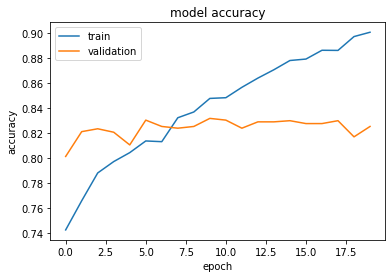

In [ ]:
hist = model.fit(train_generator,
          epochs=20,
          validation_data=test_generator,
          callbacks=[model_checkpoint_callback])
plot_hist(hist)

In [ ]:
#Load best weights
checkpoint_filepath = './checkpoint/vgg16_finetune.h5'
model.load_weights(checkpoint_filepath)

In [ ]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results_test = model.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", results_test)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions")
predictions = model.predict(X_test)
print("predictions shape:", predictions.shape)

Evaluate on test data
17/17 [==============================] - 11s 656ms/step - loss: 0.4266 - accuracy: 0.8318
test loss, test acc: [0.42664363980293274, 0.831792950630188]
Generate predictions
predictions shape: (2164, 3)


In [ ]:
#importing confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1))
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[309  35 186]
 [ 21 897  47]
 [ 49  26 594]]


In [ ]:
np.sum(confusion, axis=0) #Predicted

array([379, 958, 827])

In [ ]:
np.sum(confusion, axis=1) #Actual

array([530, 965, 669])

In [7]:
encoder = LabelEncoder()
encoder.classes_ = np.load('./checkpoint/LabelEncoder.npy', allow_pickle=True)

In [ ]:
pred_label = encoder.inverse_transform(predictions.argmax(axis=1))

In [ ]:
encoder.classes_

array(['Fear', 'Happy', 'Sad'], dtype=object)

In [8]:
encoder.inverse_transform([0])

array(['Fear'], dtype=object)